# 3.4. Target vs keyword
## 3.4.1. TRAIN.

In [18]:
#train

In [19]:
train['keyword'].fillna('', inplace=True)

In [20]:
#train['keyword'].value_counts()

In [21]:
# Creo columna con longitud de cada texto
# chequeo: train.sort_values(by='largo')

# Agrupo por target
grouped = train.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 
grouped.groups

{0: Int64Index([  15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
             ...
             7576, 7577, 7578, 7579, 7580, 7581, 7582, 7584, 7587, 7593],
            dtype='int64', length=4342),
 1: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612],
            dtype='int64', length=3271)}

## 2.2. Genero matriz para plot barras horiz con fillna(0)

In [22]:
g_unstack = grouped['keyword'].value_counts().unstack().T.fillna(0)
g_unstack['0+1'] = g_unstack[0] + g_unstack[1]
#g_unstack.sort_values(by='0+1')
g_sort_1 = g_unstack.sort_values(by=1)
g_sort_1['delta/suma'] = (g_sort_1[1] - g_sort_1[0]) / (g_sort_1[1] + g_sort_1[0])
#g_sort_1
g_sort_ds = g_sort_1.sort_values(by='delta/suma')

### 2.2.1. Grafico sort by target=1
### histogramas de keyword(target=0),  keyword(target=1), y suma de ambos

Text(0.5, 0, 'target=0 + target=1')

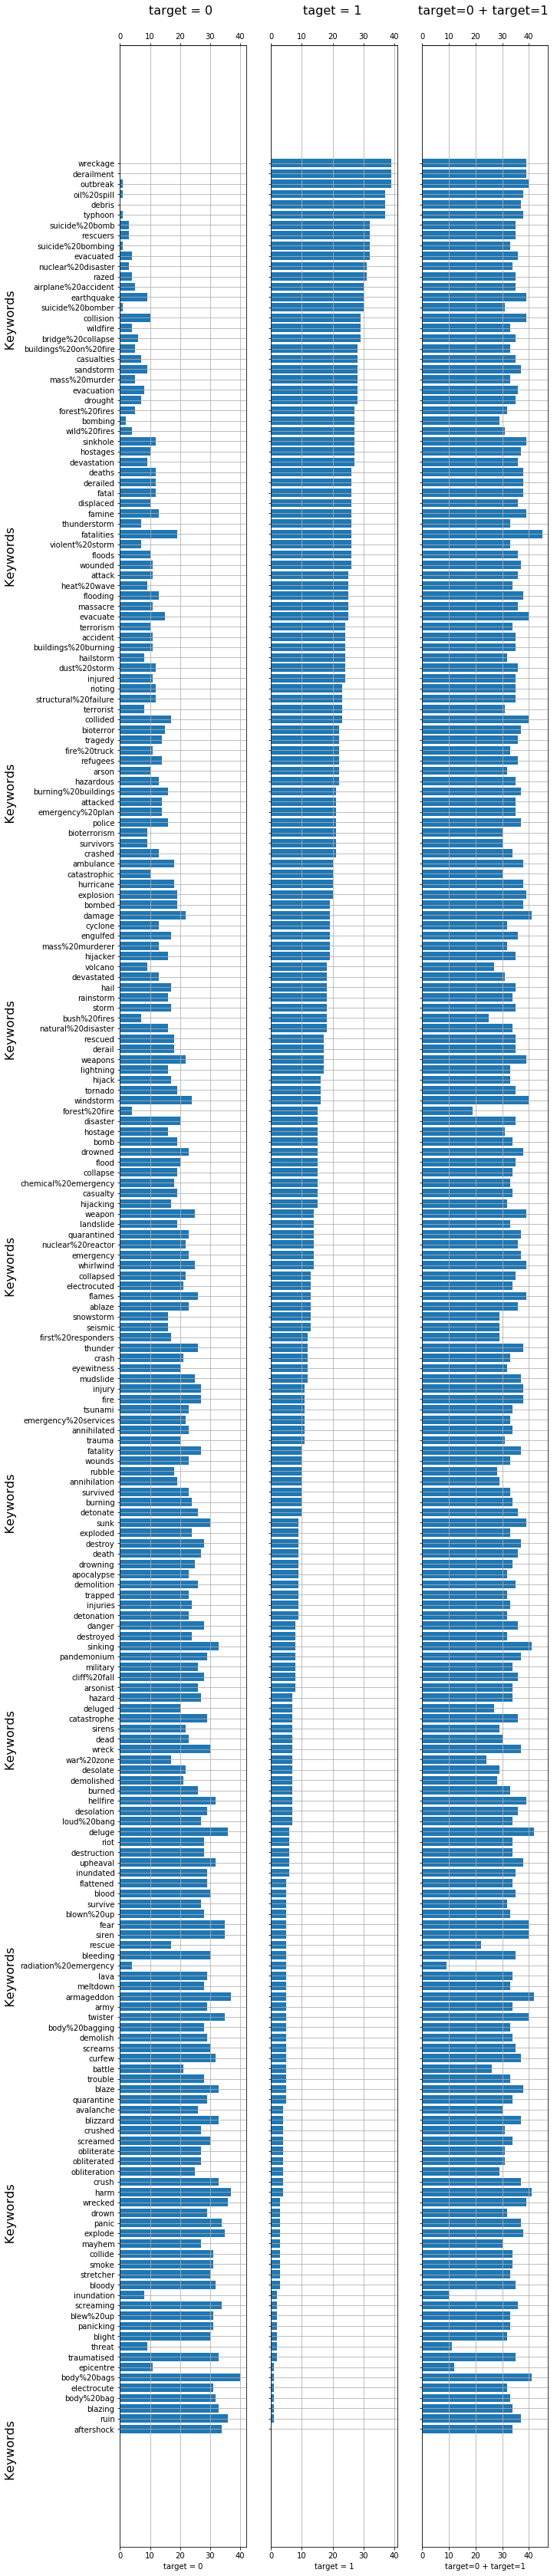

In [79]:
fig = plt.figure(figsize=(10,60))

ax1 = fig.add_subplot(131)
ax1.barh(g_sort_1.index, g_sort_1[0])
ax1.grid()
ax1.set_title('target = 0 \n', fontsize=16)
ax1.secondary_xaxis('top')
ax1.set_ylabel(('Keywords'+' '*45)*10, fontsize=16)
ax1.set_xlabel('target = 0')

ax2 = fig.add_subplot(132)
ax2.barh(g_sort_1.index, g_sort_1[1], tick_label='')
ax2.grid()
ax2.set_title('taget = 1 \n', fontsize=16)
ax2.secondary_xaxis('top')
ax2.set_xlabel('target = 1')

ax3 = fig.add_subplot(133)
ax3.barh(g_sort_1.index, g_sort_1['0+1'], tick_label='')
ax3.grid()
ax3.set_title('target=0 + target=1 \n', fontsize=16)
ax3.secondary_xaxis('top')
ax3.set_xlabel('target=0 + target=1')

### 2.2.2 Grafico sort by delta/suma
### delta/suma = diferencia(cantidad de veces que cada palabra se asocia a target=1 o target=0) / suma(idem)
### Cuanto más cerca delta/suma de 1, más se asocia la palabra a target=1; cuanto más cerca de -1, más se asocia a target=0.

Text(0.5, 0, 'n')

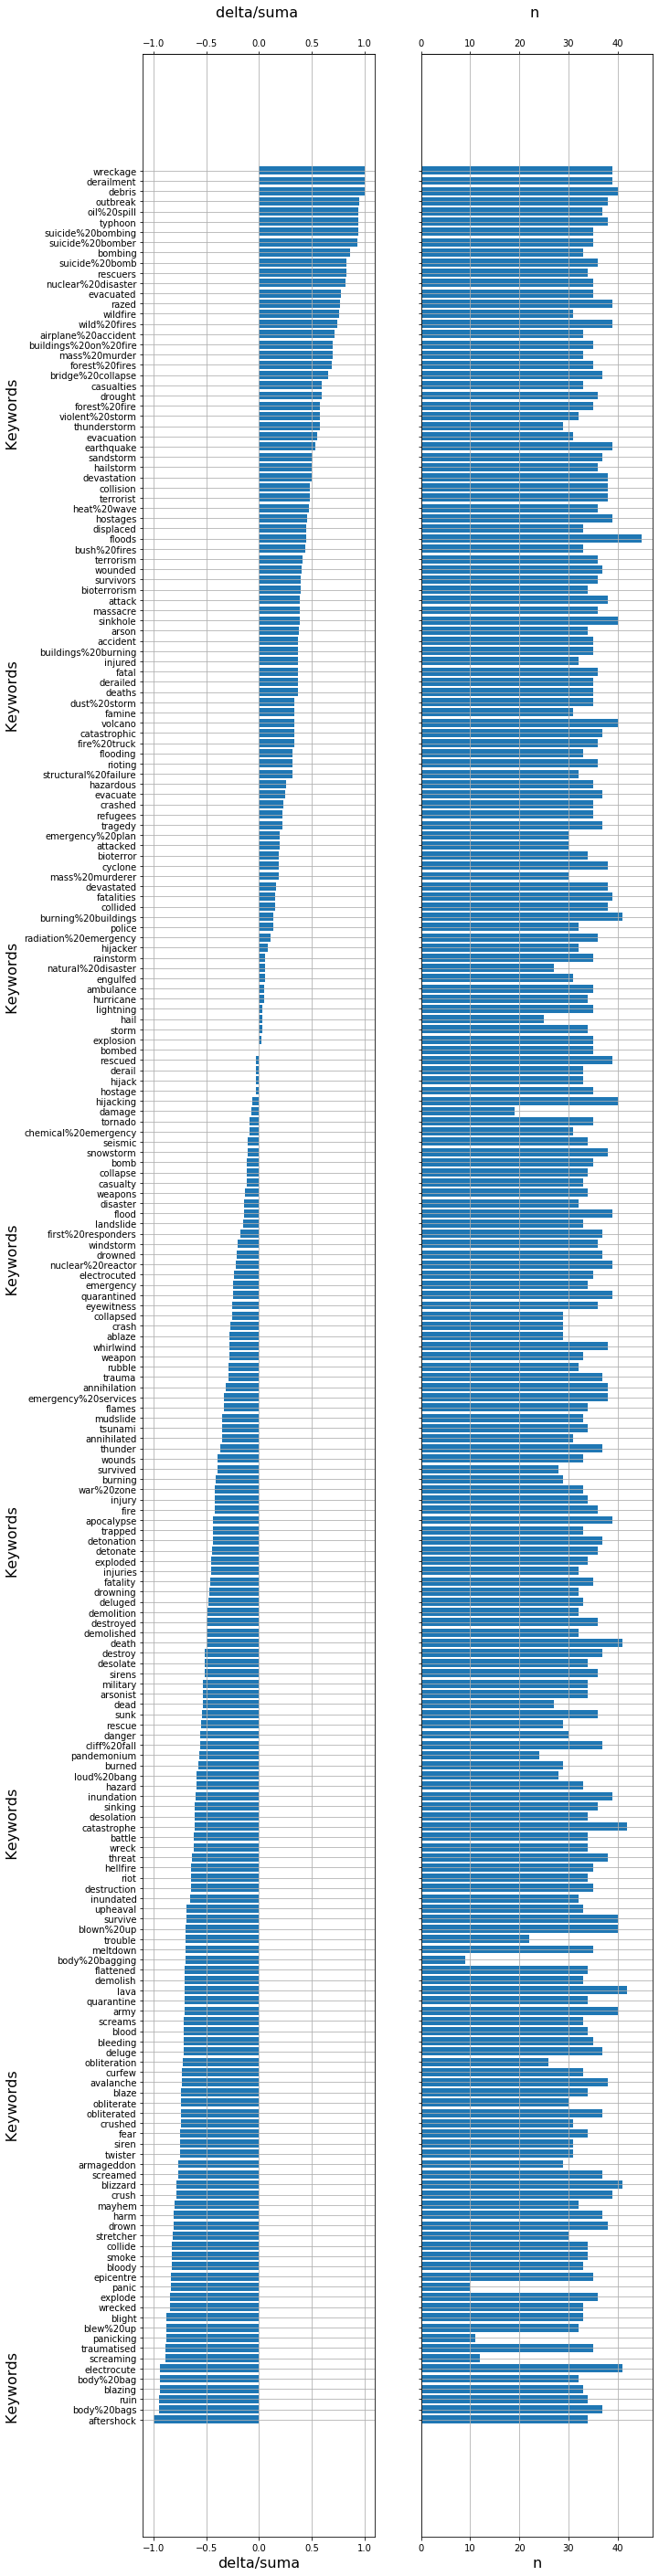

In [80]:
fig = plt.figure(figsize=(10,50))

ax1 = fig.add_subplot(121)
ax1.barh(g_sort_ds.index, g_sort_ds['delta/suma'])
ax1.grid()
ax1.set_title('delta/suma \n', fontsize=16)
ax1.secondary_xaxis('top')
ax1.set_ylabel(('Keywords'+' '*45)*8, fontsize=16)
ax1.set_xlabel('delta/suma', fontsize=16)

ax2 = fig.add_subplot(122)
ax2.barh(g_sort_1.index, g_sort_1['0+1'], tick_label='')
ax2.grid()
ax2.set_title('n \n', fontsize=16)
ax2.secondary_xaxis('top')
ax2.set_xlabel('n', fontsize=16)